In [4]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import os
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [5]:
train_path = "D:/6th sem/CSP/Website/apps/archive/train"
test_path = "D:/6th sem/CSP/Website/apps/archive/test"

In [6]:
print("Number of classes:",len(glob(train_path+"/*")))
print("Number of images for covid disease:",len(glob(train_path+"/COVID19"+"/*")))
print("Number of images without any disease:",len(glob(train_path+"/NORMAL"+"/*")))
print("Number of images for Pneumonia disease:",len(glob(train_path+"/PNEUMONIA"+"/*")))
print("Number of images for Tuberculosis disease:",len(glob(train_path+"/TURBERCULOSIS"+"/*")))

Number of classes: 4
Number of images for covid disease: 460
Number of images without any disease: 1341
Number of images for Pneumonia disease: 3875
Number of images for Tuberculosis disease: 650


In [7]:
def sample_image(sample_image_path):
    img = load_img(sample_image_path)
    print((img_to_array(img)).shape)
    plt.imshow(img)
    plt.show()

(2000, 2000, 3)


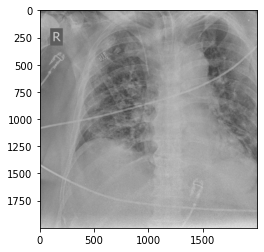

In [8]:
sample_image_path = train_path+"/COVID19/COVID19(0).jpg"
sample_image(sample_image_path)

(1662, 1774, 3)


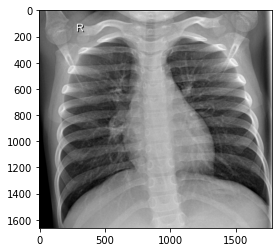

In [9]:
sample_image_path = train_path+"/NORMAL/NORMAL2-IM-0931-0001.jpeg"
sample_image(sample_image_path)

(784, 1280, 3)


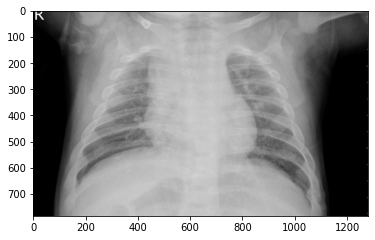

In [10]:
sample_image_path = train_path+"/PNEUMONIA/person1018_virus_1706.jpeg"
sample_image(sample_image_path)

(512, 512, 3)


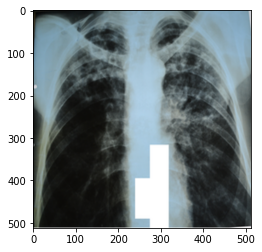

In [11]:
sample_image_path = train_path+"/TURBERCULOSIS/Tuberculosis-441.png"
sample_image(sample_image_path)

# Preprocessing

In [12]:
labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

x_train = []
y_train = []
x_test = []
y_test = []

for i in labels:
    folder_path = os.path.join("D:/6th sem/CSP/Website/apps/archive","train",i)
    print(folder_path)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(224, 224))
        x_train.append(img)
        y_train.append(i)
for i in labels:
    folder_path = os.path.join("D:/6th sem/CSP/Website/apps/archive","test",i)
    print(folder_path)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(224, 224))
        x_test.append(img)
        y_test.append(i)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
        

D:/6th sem/CSP/Website/apps/archive\train\COVID19
D:/6th sem/CSP/Website/apps/archive\train\NORMAL
D:/6th sem/CSP/Website/apps/archive\train\PNEUMONIA
D:/6th sem/CSP/Website/apps/archive\train\TURBERCULOSIS
D:/6th sem/CSP/Website/apps/archive\test\COVID19
D:/6th sem/CSP/Website/apps/archive\test\NORMAL
D:/6th sem/CSP/Website/apps/archive\test\PNEUMONIA
D:/6th sem/CSP/Website/apps/archive\test\TURBERCULOSIS


(-0.5, 223.5, 223.5, -0.5)

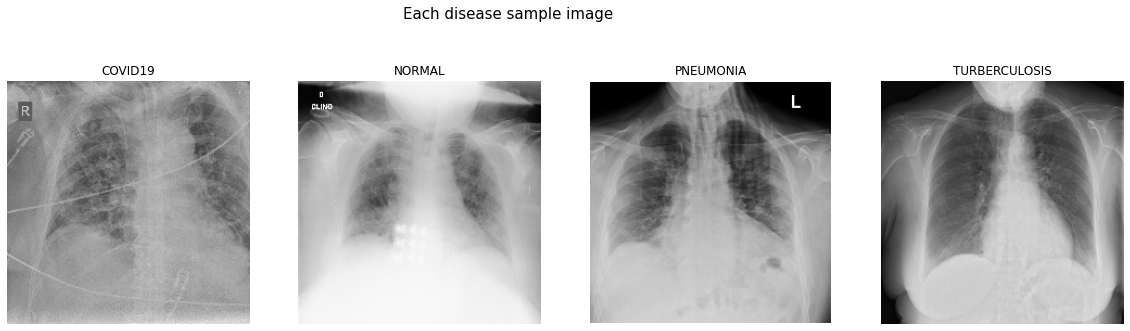

In [13]:
fig,axis = plt.subplots(1,4,figsize=(20,20))
fig.text(s="Each disease sample image",y=0.63,x=0.4,size=15)

axis[0].imshow(x_train[0])
axis[0].set_title(labels[0])
axis[0].axis('off')

axis[1].imshow(x_train[1])
axis[1].set_title(labels[1])
axis[1].axis('off')

axis[2].imshow(x_train[2])
axis[2].set_title(labels[2])
axis[2].axis('off')

axis[3].imshow(x_train[3])
axis[3].set_title(labels[3])
axis[3].axis('off')

In [14]:
x_train.shape

(6326, 224, 224, 3)

In [15]:
ytrain = []
for i in y_train:
    ytrain.append(labels.index(i))
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = []
for i in y_test:
    ytest.append(labels.index(i))
ytest = tf.keras.utils.to_categorical(ytest)

In [16]:
ytrain = np.array(ytrain)
print(y_train.shape)
print(ytrain.shape)

(6326,)
(6326, 4)


In [17]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 56, 56, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_a

 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
          

                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_s

 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 14, 14, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_a

                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 7, 7, 1152)  10368       ['block7a_expand_activation[0][0]
 D)       

In [18]:
model = efficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = model)

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', 
              metrics= ['accuracy'])

In [20]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("CovidModelEfficientNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
hist = model.fit(x_train,
                 ytrain,
                 validation_split=0.1, 
                 epochs =15, 
                 verbose=1, 
                 batch_size=32,
                  callbacks=[tensorboard,checkpoint,reduce_lr]
                 )

Epoch 1/15
 54/178 [========>.....................] - ETA: 6:09 - loss: 0.2446 - accuracy: 0.9132

In [ ]:
results = model.evaluate(x_train,ytrain)

In [ ]:
results = model.evaluate(x_test,ytest)

In [ ]:
model.save("model.h5")